# Solving the world food shortage problem through Data Storytelling
The project involves the use of many visualisations accompanied by narratives to tell a story making it easy to understand the problem (world food shortage) and how the problem can be solved.

### The following requirements need to be considered along with own considerations:
   A) Trends in food production and consumption over the years.
   B) Average and median food production, the outliers, Quartile and interquartile ranges. (preferably a
           Boxplot) .
   C) A comparison between average food consumption and production for each year.
    
### Information about the datasets:
   a) Africa food production dataset: the data contains information about the quantity (kt) of food produced in 45 African            countries between 2004 and 2013 inclusive. It consists of 23110 rows and 4 columns. The columns in the dataset are :            Country, Year, Item and Value.
   b) Africa food supply dataset: the data contains information about the quantity (kt) of food produced in 45 African            countries between 2004 and 2013 inclusive. It consists of 450 rows and 3 columns. The columns in the dataset are :            Country, Year and Value.
    
### Steps in undertaking the Project:
   a) Read datasets
   b) Data Preprocessing
   c) Visualize the data using the most appropriate charts, graphics and graphs
   d) Accompany visuals with narratives to help understand patterns and trends found in data
   e) Give a summary of problem identified in data and profer solution sto the problem
        

        - 

## Load Datasets

In [1]:
#Import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import plotly.express as px
from plotly.offline import plot

### A) African food production dataset.

In [2]:
#Read African food production dataset
url = 'C:/Users/Ganiyat Omotola/Desktop/Hamoye DS Internship/Stage C/df_production.csv'
#url = 'https://www.wolframcloud.com/obj/mar/Hamoye/Session%202/Data/Africa%20Food%20Production%20(2004%20-%202013).csv'
production_df = pd.read_csv(url, error_bad_lines=False)
#change the name of the Value column to Quantity [kt]
production_df.rename(columns={'Value':'Value [kt]'},inplace=True)
#production_df.head()

### B) African food consumption (supply) dataset.

In [3]:
#Read African food supply dataset
url = 'C:/Users/Ganiyat Omotola/Desktop/Hamoye DS Internship/Stage C/df_supply.csv'
#url = 'https://www.wolframcloud.com/obj/mar/Hamoye/Session%202/Data/Africa%20Food%20Supply%20(2004%20-%202013).csv'
supply_df = pd.read_csv(url, error_bad_lines=False)
#change the name of the Value column to Quantity [kcal/(person day)] 
supply_df.rename(columns={'Value':'Value [kcal/(person day)]'}, inplace=True)
#supply_df.head()

### C) External World population dataset.
 The external world population dataset was used for analysing the two datasets for food production and consumption in Africa.

In [4]:
#Read External world population dataset
population_df = pd.read_csv('C:/Users/Ganiyat Omotola/Desktop/Hamoye DS Internship/Stage C/datasets/population_data.csv', skiprows=range(4))
population_df = population_df[['Country Name','Country Code','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013']]
#converting the years into a column
population_df = pd.melt(population_df, id_vars= ['Country Name','Country Code'], var_name='Year')
population_df.columns = ['Country','Code','Year','Population']
population_df.to_csv('population_df.csv')
world_population = population_df.drop(['Year'], axis=1)
#world_population.head()

## Exploratory Data Analysis
The next step after loading the datasets is to perform EDA on the datasets using Statistical techniques.

### Data Preprocessing:
This is done before Data Analysis and Visualizations. It involves cleaning and transforming of Datasets.

In [5]:
#Check information about production dataset
production_df['Year'] = production_df['Year'].astype(str)
#production_df.info()

In [6]:
#check information about 
supply_df['Year'] = supply_df['Year'].astype(str)
#supply_df.info()

In [7]:
population_df['Year'] = population_df['Year'].astype(str)
#population_df.info()

### Grouping of African Food Production and Supply datasets for easy visualisations.

  #### a) Food Production Dataset.

Grouping by all variables based on similarity in observations

In [8]:
#Total quantity of items for the african countries in each year
totalProd_CY = production_df.groupby(['Country','Year'], as_index=False).sum()
totalProd_CY
#Average quantity of items for the african countries in each year
meanProd_CY = production_df.groupby(['Country','Year'], as_index=False).mean()
meanProd_CY
#Total quantity of food items for each year
totalProd_IY = production_df.groupby(['Item','Year'],as_index=False).sum()
totalProd_IY
#Average quantity of food items for each year
meanProd_IY = production_df.groupby(['Item','Year'],as_index=False).mean()
meanProd_IY
#Total quantity of food items for each year
totalProd_CI = production_df.groupby(['Country','Item'], as_index=False).sum()
totalProd_CI
#Average quantity of food items for each year
meanProd_CI = production_df.groupby(['Country','Item'], as_index=False).mean()
meanProd_CI
#Total quantity of food items
totalProd_I = production_df.groupby('Item', as_index=False).sum()
totalProd_I
#Average quantity of food items
meanProd_I = production_df.groupby('Item', as_index=False).mean()
meanProd_I
#Total quantity of food items by country
totalProd_C = production_df.groupby('Country', as_index=False).sum()
totalProd_C
#Average quantity of food items by country
meanProd_C = production_df.groupby('Country', as_index=False).mean()
meanProd_C
#Total quantity of food items by year
totalProd_Y = production_df.groupby('Year', as_index=False).sum()
totalProd_Y
#Average quantity of food items by year
meanProd_Y = production_df.groupby('Year', as_index=False).mean()
#meanProd_Y

  #### a) Food Supply Dataset.

Grouping by Country and Year

In [9]:
meanSupp_CY = supply_df.groupby(['Country','Year'],as_index=False).mean()
meanSupp_CY
#Total food items supplied by Country
totalSupp_C = supply_df.groupby('Country', as_index=False).sum()
totalSupp_C.head()
#Average food items supplied by Country
meanSupp_C = supply_df.groupby('Country', as_index=False).mean()
meanSupp_C.head()
#Total food items supplied by Year
totalSupp_Y = supply_df.groupby('Year', as_index=False).sum()
totalSupp_Y.head()
#Average food items supplied by Year
meanSupp_Y = supply_df.groupby('Year', as_index=False).mean()
#meanSupp_Y.head()
#totalSupp_C.head()

In [10]:
#Sort values by country to get the top 20 countries with most food production
prodByC_orderedT = totalProd_C.sort_values('Value [kt]', ascending=False, axis = 0)
prodByC_top20 = prodByC_orderedT.head(20)
#Sort values by country to get the bottom 20 countries with most food production
prodByC_orderedB = totalProd_C.sort_values('Value [kt]', axis = 0).head(20)
prodByC_bottom20 = prodByC_orderedB.head(20)
#Sort values to get the top 20 items  mostly  produced
prodByI_orderedT = totalProd_I.sort_values('Value [kt]', ascending=False, axis = 0).head(20)
prodByI_top20 = prodByI_orderedT.head(20)
#Sort values to get the bottom 20 items  mostly  produced
prodByI_orderedB = totalProd_I.sort_values('Value [kt]', axis = 0).head(20)
prodByI_bottom20 = prodByI_orderedB.head(20)
#prodByI_bottom20
#prodByI_bottom20.Item.values

In [11]:
#Sort values by country to get the top 20 countries with most food supply
suppByC_top20 = totalSupp_C.sort_values('Value [kcal/(person day)]', ascending=False, axis = 0).head(20)
suppByC_top20.head()
suppByC_bottom20 = totalSupp_C.sort_values('Value [kcal/(person day)]', ascending=True, axis = 0).head(20)
#suppByC_bottom20
#suppByC_bottom20.Country.values

In [12]:
#Combine the food production and food supply datasets grouped by Year
totalPS_Y = totalProd_Y.merge(totalSupp_Y, on='Year')
totalPS_Y.columns =['Year','Quantity Produced','Quantity Supplied']
meanPS_Y = meanProd_Y.merge(meanSupp_Y, on='Year')
meanPS_Y.columns =['Year','Quantity Produced','Quantity Supplied']
#totalPC_Y
#totalProd_Y

## Data Visualization and Data Storytelling

In [13]:
plt.style.use('seaborn')

### Top 20 Countries based on quantity of food items produced

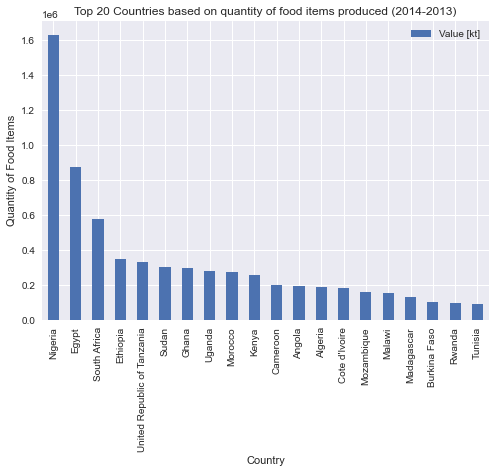

In [14]:
prodByC_top20.plot(kind='bar',title='Top 20 Countries based on quantity of food items produced (2014-2013)',label='Country')
plt.xlabel('Country')
plt.ylabel('Quantity of Food Items')
plt.xticks(np.arange(20),['Nigeria', 'Egypt', 'South Africa', 'Ethiopia',
       'United Republic of Tanzania', 'Sudan', 'Ghana', 'Uganda',
       'Morocco', 'Kenya', 'Cameroon', 'Angola', 'Algeria',
       "Cote d'Ivoire", 'Mozambique', 'Malawi', 'Madagascar',
       'Burkina Faso', 'Rwanda', 'Tunisia'])
plt.legend()
plt.show()

#### Narratives:
Nigeria produced the highest quantity of food items between years 2014 to 2013, followed by Egypt and then South Africa.

### Bottom 20 Countries based on quantity of food items produced

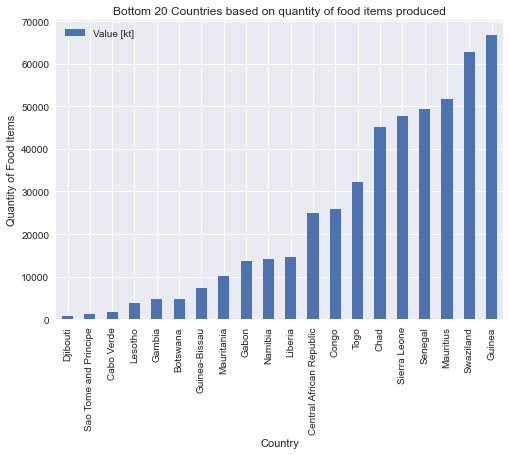

In [15]:
prodByC_bottom20.plot(kind='bar',title='Bottom 20 Countries based on quantity of food items produced',label='Country')
plt.xlabel('Country')
plt.ylabel('Quantity of Food Items')
plt.xticks(np.arange(20),['Djibouti', 'Sao Tome and Principe', 'Cabo Verde', 'Lesotho',
       'Gambia', 'Botswana', 'Guinea-Bissau', 'Mauritania', 'Gabon',
       'Namibia', 'Liberia', 'Central African Republic', 'Congo', 'Togo',
       'Chad', 'Sierra Leone', 'Senegal', 'Mauritius', 'Swaziland',
       'Guinea'])
plt.legend()
plt.show()

#### Narrative:
Djibouti produced the lowest quantity of food items between 2004 to 2013 inclusive, followed by Sao Tome and Principe, and Cabo Verde.

### Top 20 Food Items based on quantity produced

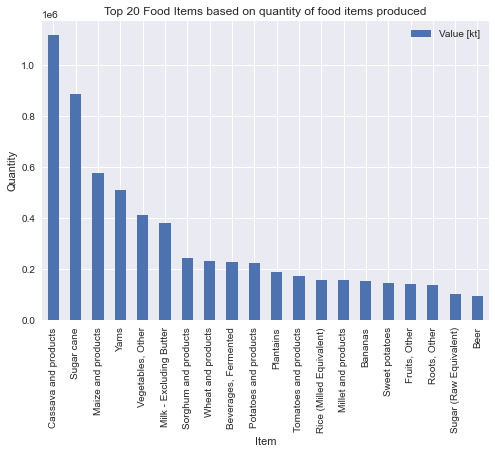

In [16]:
prodByI_top20.plot(kind='bar',title='Top 20 Food Items based on quantity of food items produced',label='Item')
plt.xlabel('Item')
plt.ylabel('Quantity')
plt.xticks(np.arange(20),['Cassava and products', 'Sugar cane', 'Maize and products', 'Yams',
       'Vegetables, Other', 'Milk - Excluding Butter',
       'Sorghum and products', 'Wheat and products',
       'Beverages, Fermented', 'Potatoes and products', 'Plantains',
       'Tomatoes and products', 'Rice (Milled Equivalent)',
       'Millet and products', 'Bananas', 'Sweet potatoes',
       'Fruits, Other', 'Roots, Other', 'Sugar (Raw Equivalent)', 'Beer'])
plt.legend()
plt.show()

#### Narratives:
"Cassava and products" was the most produced food item between the period 2004 to 2013, followed by "sugar cane" and then "maize and products".

### Bottom 20 Food Items based on quantity  produced

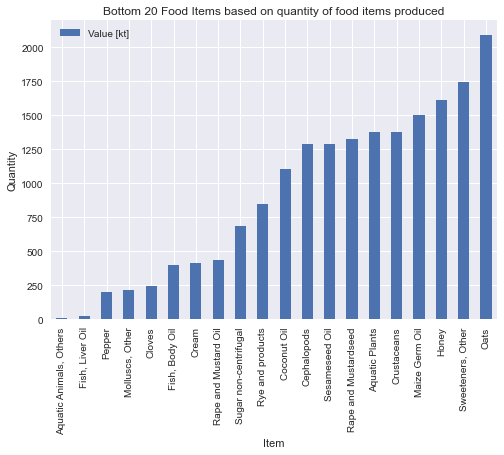

In [17]:
prodByI_bottom20.plot(kind='bar',title='Bottom 20 Food Items based on quantity of food items produced',label='Item')
plt.xlabel('Item')
plt.ylabel('Quantity')
plt.xticks(np.arange(20),['Aquatic Animals, Others', 'Fish, Liver Oil', 'Pepper',
       'Molluscs, Other', 'Cloves', 'Fish, Body Oil', 'Cream',
       'Rape and Mustard Oil', 'Sugar non-centrifugal',
       'Rye and products', 'Coconut Oil', 'Cephalopods', 'Sesameseed Oil',
       'Rape and Mustardseed', 'Aquatic Plants', 'Crustaceans',
       'Maize Germ Oil', 'Honey', 'Sweeteners, Other', 'Oats'])
plt.legend()
plt.show()

##### Narrative:
"Aquatic Animals, Others" was the least produced food item between 2004 to 2013 inclusive followed by "Fish, Liver Oil" and then "Pepper".

### Top 20 Countries based on quantity of food items supplied

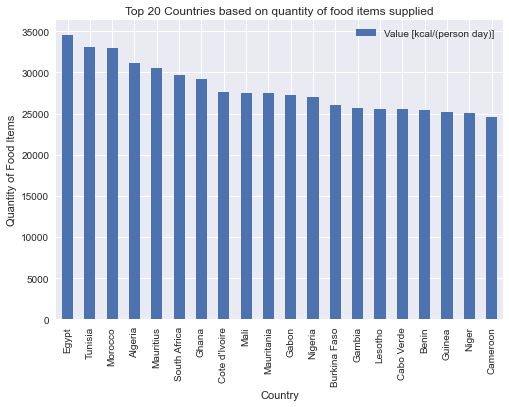

In [18]:
suppByC_top20.plot(kind='bar', title='Top 20 Countries based on quantity of food items supplied')
plt.xlabel('Country')
plt.ylabel('Quantity of Food Items')
plt.xticks(np.arange(20),['Egypt', 'Tunisia', 'Morocco', 'Algeria', 'Mauritius',
       'South Africa', 'Ghana', "Cote d'Ivoire", 'Mali', 'Mauritania',
       'Gabon', 'Nigeria', 'Burkina Faso', 'Gambia', 'Lesotho',
       'Cabo Verde', 'Benin', 'Guinea', 'Niger', 'Cameroon'])
plt.legend()
plt.show()

#### Narrative:
Egypt produced the highest quantity of food items between the period 2004 to 2013 followed by Tunisia and then Morocco.

### Bottom 20 Countries based on quantity of food items supplied

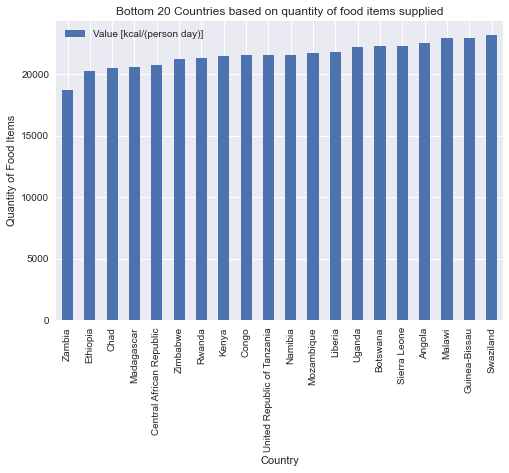

In [19]:
suppByC_bottom20.plot(kind='bar', title='Bottom 20 Countries based on quantity of food items supplied')
plt.xlabel('Country')
plt.ylabel('Quantity of Food Items')
plt.xticks(np.arange(20),['Zambia', 'Ethiopia', 'Chad', 'Madagascar',
       'Central African Republic', 'Zimbabwe', 'Rwanda', 'Kenya', 'Congo',
       'United Republic of Tanzania', 'Namibia', 'Mozambique', 'Liberia',
       'Uganda', 'Botswana', 'Sierra Leone', 'Angola', 'Malawi',
       'Guinea-Bissau', 'Swaziland'])
plt.legend()
plt.show()

##### Narrative:
Zambia produced the least quantity of food items between 2004 to 2013 followed by Ethopia and then Chad.

### Trend in Food Production over the years

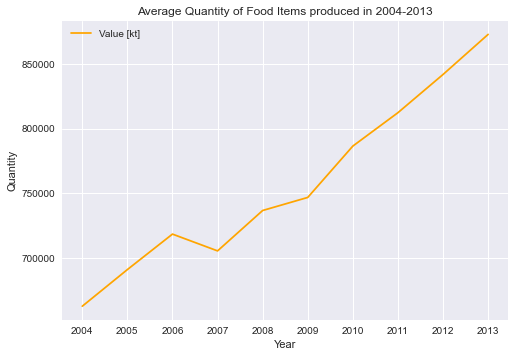

In [20]:
totalProd_Y.plot(kind='line',color='orange')
plt.title("Average Quantity of Food Items produced in 2004-2013")
plt.ylabel("Quantity")
plt.xlabel('Year')
plt.xticks(np.arange(10),['2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011','2012', '2013'])
plt.show()

##### Narrative: 
The quantity of food items produced between 2004 to 2013 increased each year in respect to previous year except in 2007 that there was a fall.

### Trend in Food Consumption over the years

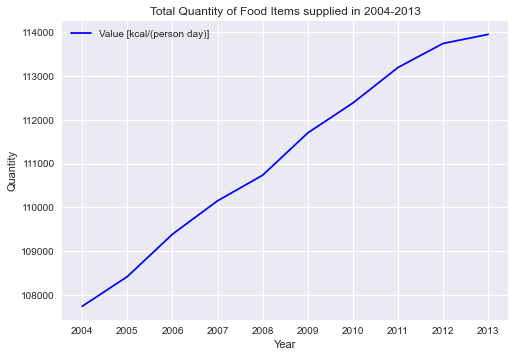

In [21]:
totalSupp_Y.plot(kind='line',color='blue')
plt.title("Total Quantity of Food Items supplied in 2004-2013")
plt.ylabel("Quantity")
plt.xlabel('Year')
plt.xticks(np.arange(10),['2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011','2012', '2013'])
plt.show()

##### Narrative: 
The quantity of food items supplied between 2004 to 2013 increased each year in respect to previous year. 

### Comparison between food production and consumption over the years

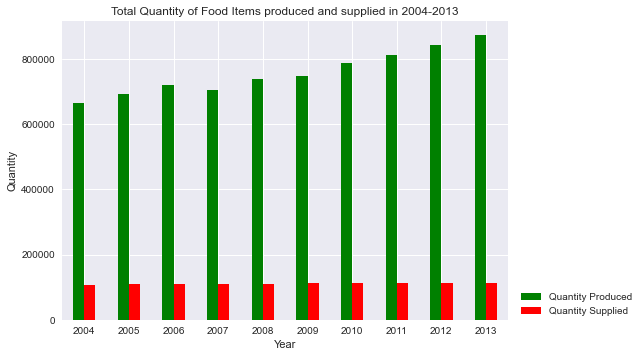

In [22]:
totalPS_Y.plot(kind='bar',color=['green','red'])
plt.title("Total Quantity of Food Items produced and supplied in 2004-2013")
plt.ylabel("Quantity")
plt.xlabel('Year')
#plt.yscale('log')
plt.xticks(np.arange(10),['2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011','2012', '2013'],rotation=0)
plt.legend(loc=(1.02,0))
plt.show()

##### Narrative:
There was significant difference in the quantity of food produced and quantity supplied across the year 2004 to 2013. Most food items produced were not supplied for consumption to the population in the African countries. 

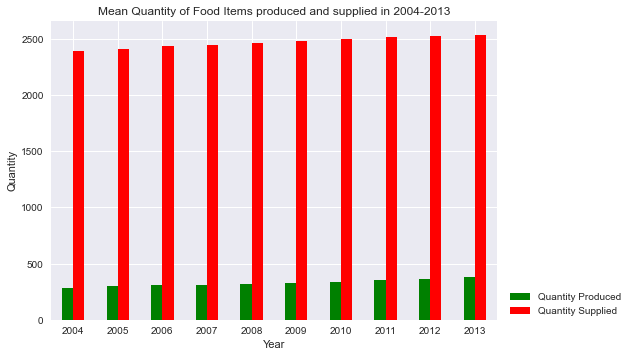

In [23]:
meanPS_Y.plot(kind='bar',color=['green','red'])
plt.title("Mean Quantity of Food Items produced and supplied in 2004-2013")
plt.ylabel("Quantity")
plt.xlabel('Year')
#plt.yscale('log')
plt.xticks(np.arange(10),['2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011','2012', '2013'],rotation=0)
plt.legend(loc=(1.02,0))
plt.show()

##### Narrative:
The average food supplied in each year (2004 to 2013) is almost 10 times that of the average food produced aross the same years. This depicts that many countries produced very few quantity of the food items

### Detecting extreme quantity of food items over the years

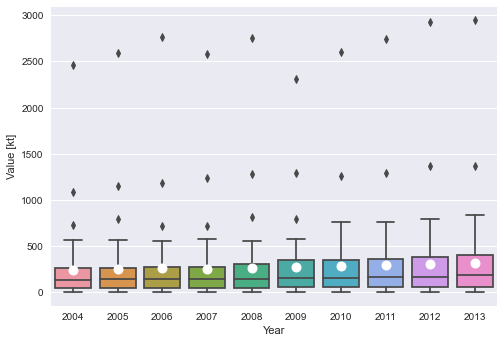

In [24]:
#For Production dataset
meanProd_Y.head()
sns.boxplot(x='Year', y='Value [kt]', data=meanProd_CY, showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
#totalProd_Y.head()
Q1 = meanProd_CY['Value [kt]'].quantile(0.25)
Q3 = meanProd_CY['Value [kt]'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 
lower_fence = Q1 - (1.5 * IQR)
upper_fence = Q3 + (1.5 * IQR)
filter = (meanProd_CY['Value [kt]'] < lower_fence) | (meanProd_CY['Value [kt]'] > upper_fence)
#meanProd_CY.loc[filter]  

##### Narrative:


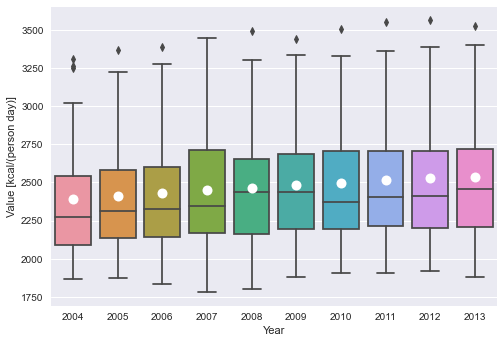

In [25]:
sns.boxplot(x='Year', y='Value [kcal/(person day)]', data=meanSupp_CY, showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
Q1 = meanSupp_CY['Value [kcal/(person day)]'].quantile(0.25)
Q3 = meanSupp_CY['Value [kcal/(person day)]'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 
lower_fence2 = Q1 - 1.5 * (IQR)
upper_fence2 = Q3 + 1.5 * (IQR)
filter = (meanSupp_CY['Value [kcal/(person day)]'] < lower_fence2) | (meanSupp_CY['Value [kcal/(person day)]'] > upper_fence2)
#meanSupp_CY.loc[filter]  

##### Narrative:


### Trend in Food Production for each country over the years

Text(0.5, 1.0, 'Trend in Food Production for each country over the years')

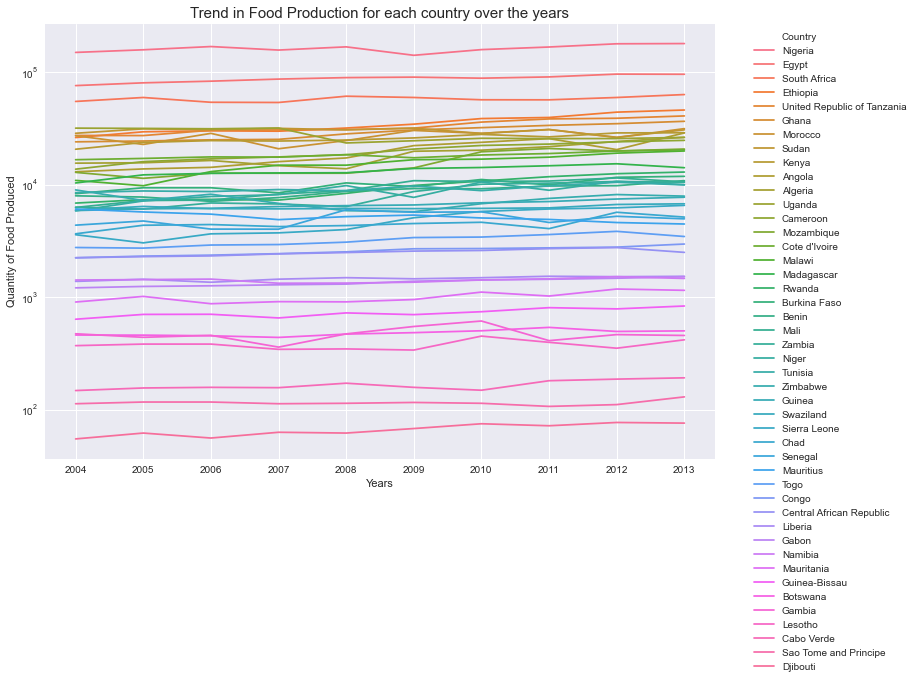

In [26]:
country_ordered = totalProd_CY.sort_values(['Year','Value [kt]'], ascending=False, axis=0)
fig = plt.gcf()
fig.set_size_inches(12, 8)
line_plot = sns.lineplot(x='Year', y='Value [kt]', hue='Country',data=country_ordered )
line_plot.set_yscale('log')
plt.xlabel('Years')
plt.ylabel('Quantity of Food Produced')
line_plot.legend(loc='upper right', bbox_to_anchor=(1.3,1))
plt.title('Trend in Food Production for each country over the years', fontsize=15)

##### Narrative:

### Trend in Food Supply for each country over the years

Text(0.5, 1.0, 'Trend in Food Supply for each country over the years')

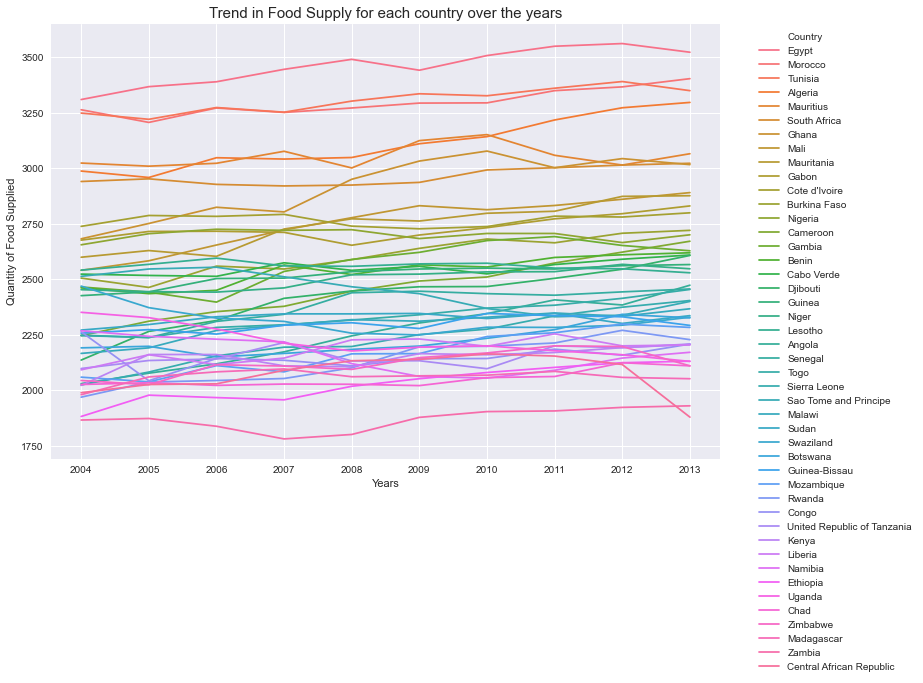

In [27]:
supply_ordered = supply_df.sort_values(['Year','Value [kcal/(person day)]'], ascending=False, axis=0)
#supply_ordered
fig = plt.gcf()
fig.set_size_inches(12, 8)
line_plot = sns.lineplot(x='Year', y='Value [kcal/(person day)]', hue='Country',data=supply_ordered)
#line_plot.set_yscale('log')
plt.xlabel('Years')
plt.ylabel('Quantity of Food Supplied')
line_plot.legend(loc='upper right', bbox_to_anchor=(1.3,1))
plt.title('Trend in Food Supply for each country over the years', fontsize=15)


##### Narrative:
Egypt maintained the top country that supplied the highest quantity of food items across the years 2004 to 2013 while Central African Republic supplied the least in all the years except in 2013 that Zambia was the lowest food supplied country.

### Relationship between the Mean production and Mean population

In [28]:
population_df.head()
meanPop_Y = population_df.groupby(['Year'],as_index=False).mean()
meanPop_C = population_df.groupby(['Country'], as_index=False).mean()
meanPPo_Y = meanProd_Y.merge(meanPop_Y, on='Year')
meanPPo_C = meanProd_C.merge(meanPop_C, on='Country')
meanPPo_C
meanPPo_Y
meanSPo_Y = meanSupp_Y.merge(meanPop_Y, on='Year')
meanSPo_C = meanSupp_C.merge(meanPop_C, on='Country')
meanPSPo_C = meanPPo_C.merge(meanSPo_C, on=['Country','Population'])
meanPSPo_Y = meanPPo_Y.merge(meanSPo_Y, on=['Year','Population'])
px.scatter(meanPPo_Y, x='Value [kt]', y='Population', text='Year')
#meanPSPo_Y

##### Narrative:
An increase in the population approximately brought an increase in the food produced across the years 2004 to 2013.

In [29]:
px.scatter(meanPPo_C, x='Value [kt]', y='Population', text='Country')

##### Narrative:

### Relationship between the Mean consumption and Mean population

In [30]:
px.scatter(meanSPo_Y, x='Value [kcal/(person day)]', y='Population', text='Year')

##### Narrative:
An increase in the population approximately brought an increase in the food supplied across the years 2004 to 2013.

In [31]:
px.scatter(meanSPo_C, x='Value [kcal/(person day)]', y='Population', text='Country')


##### Narrative:

### Average Food Production by Country

In [32]:
from plotly.offline import plot
fig = px.scatter(meanProd_C, x='Country', y='Value [kt]', title ='AVERAGE FOOD PRODUCTION BY COUNTRY',text='Country')
#add two horizontal lines
fig.update_layout(width=1000, height=900, autosize=False, shapes=[
    #lower fence
    dict(type='line', xref='paper', x0=0, x1=1, yref='y', y0=lower_fence, y1=lower_fence, line=dict(
    color='Red', width=1)),
    #mean
    dict(type='line', xref='paper', x0=0, x1=1, yref='y', y0=meanProd_C['Value [kt]'].mean(), y1=meanProd_C['Value [kt]'].mean(), line=dict(
    color='Orange', width=1)),
    #median
    dict(type='line', xref='paper', x0=0, x1=1, yref='y', y0=meanProd_C['Value [kt]'].median(), y1=meanProd_C['Value [kt]'].median(), line=dict(
    color='Blue', width=1)),
    #upper fence
    dict(type='line', xref='paper', x0=0, x1=1, yref='y', y0=upper_fence, y1=upper_fence, line=dict(
    color='Green', width=1))], showlegend=False)

fig.update_traces(textposition='top center')
fig.update_xaxes(showticklabels= False)

fig

##### Narratives:
Nigeria, Egypt and South Africa produced extremely high quantities of food items above other countries in Africa.

### Average Food Supply by Country

In [33]:
from plotly.offline import plot
fig = px.scatter(meanSupp_C, x='Country', y='Value [kcal/(person day)]', title ='AVERAGE FOOD SUPPLY BY COUNTRY',text='Country')
#add two horizontal lines
fig.update_layout(width=1000, height=900, autosize=False, shapes=[
    #lower fence
    dict(type='line', xref='paper', x0=0, x1=1, yref='y', y0=lower_fence2, y1=lower_fence2, line=dict(
    color='Red', width=1)),
    #mean
    dict(type='line', xref='paper', x0=0, x1=1, yref='y', y0=meanSupp_C['Value [kcal/(person day)]'].mean(), y1=meanSupp_C['Value [kcal/(person day)]'].mean(), line=dict(
    color='Orange', width=1)),
    #median
    dict(type='line', xref='paper', x0=0, x1=1, yref='y', y0=meanSupp_C['Value [kcal/(person day)]'].median(), y1=meanSupp_C['Value [kcal/(person day)]'].median(), line=dict(
    color='Blue', width=1)),
    #upper fence
    dict(type='line', xref='paper', x0=0, x1=1, yref='y', y0=upper_fence2, y1=upper_fence2, line=dict(
    color='Green', width=1))], showlegend=False)

fig.update_traces(textposition='top center')
fig.update_xaxes(showticklabels= False)

fig

##### Narratives:
Only Egypt supplied extremely high quantities of food between 2004 to 2013 above other countries in Africa.

### Map showing the quantity of food items produced in African countries

In [34]:
country_code = population_df.drop(['Population','Year'], axis=1)
country_code.head()
country_code = country_code.drop_duplicates(subset='Country',keep='first')
country_code['Country'] = country_code['Country'].replace(['Congo, Dem. Rep.','Egypt, Arab Rep.','Eswatini','Gambia, The','Tanzania'],['Congo','Egypt','Swaziland','Gambia','United Republic of Tanzania'])
country_code
production_map = totalProd_CY
production_map['Year'] = production_map['Year'].astype(str)
totalProd_CCo = production_map.merge(country_code, on='Country', how='right')
totalProd_CCo.head()
px.choropleth(totalProd_CCo, locations='Code',hover_name='Country', title = 'Food Production in Africa (2004-2013)', 
                   color='Value [kt]',labels={'Value [kt]':'Quantity'}, scope='africa',
                    color_continuous_scale=px.colors.sequential.Plasma, animation_frame='Year') 

##### Narrative:


### Map showing the quantity of food items supplied in African countries

In [35]:
supply_map = supply_df
supply_map['Year'] = supply_map['Year'].astype(str)
totalSupp_CCo = supply_map.merge(country_code, on='Country', how='right')
totalSupp_CCo.head()
px.choropleth(totalSupp_CCo, locations='Code',hover_name='Country', title = 'Food Supply in Africa (2004-2013)', 
                   color='Value [kcal/(person day)]',labels={'Value [kcal/(person day)]':'Quantity'}, scope='africa',
                    color_continuous_scale=px.colors.sequential.Plasma, animation_frame='Year') 

##### Narrative:


### Map showing the cassava produced in the African countries between 2004 to 2013

In [36]:
cassava_prod = production_df.loc[production_df['Item'] == 'Cassava and products', ['Country','Year','Value [kt]']]
cassava_prod.head()
cassava_map = cassava_prod
cassava_map['Year'] = cassava_map['Year'].astype(str)
cassava_map = cassava_map.merge(country_code, on='Country', how='right')
cassava_map.head()
px.choropleth(cassava_map, locations='Code',hover_name='Country', title = 'Cassava Food Production in Africa (2004-2013)', 
                   color='Value [kt]',labels={'Value [kt]':'Quantity'}, scope='africa',
                    color_continuous_scale=px.colors.sequential.Plasma, animation_frame='Year') 

##### Narrative: 


### Correlation of Mean Food Produced and Mean Population over the years 

In [37]:
prod_rice = meanProd_IY.loc[meanProd_IY['Item']=='Rice (Milled Equivalent)']
prod_rice = prod_rice.groupby(['Year'],as_index=False).mean()
prod_rice = prod_rice.merge(meanPop_Y, on='Year')
#prod_rice.head()

In [38]:
corr = prod_rice.corr()
corr
from scipy import stats
a = np.array(prod_rice['Population'].values)
b = np.array(prod_rice['Value [kt]'].values)
#stats.pearsonr(a,b)

In [39]:
corr2 = meanSPo_Y.corr()
corr2
from scipy import stats
a = np.array(meanSPo_Y['Population'].values)
b = np.array(meanSPo_Y['Value [kcal/(person day)]'].values)
#stats.pearsonr(a,b)